<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked     

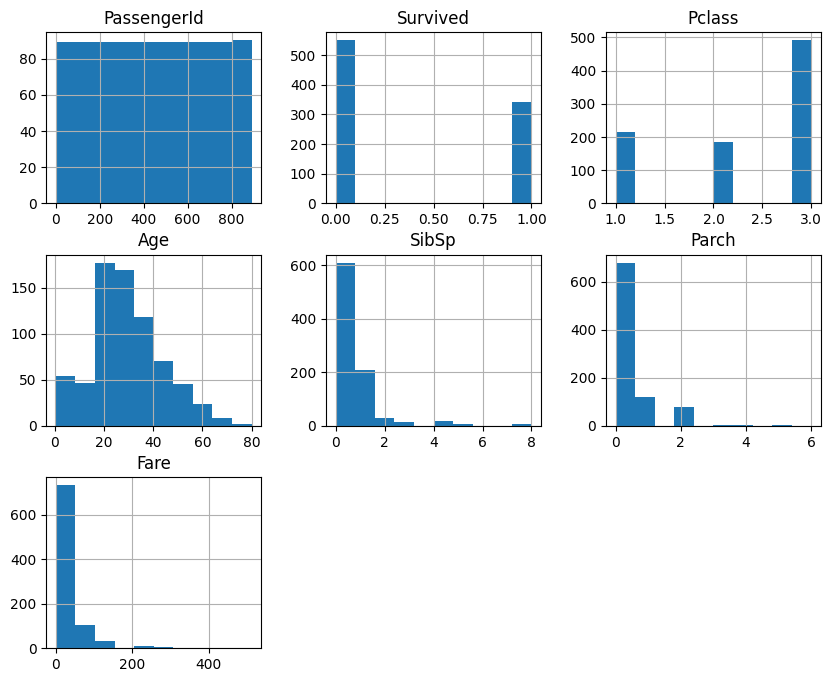

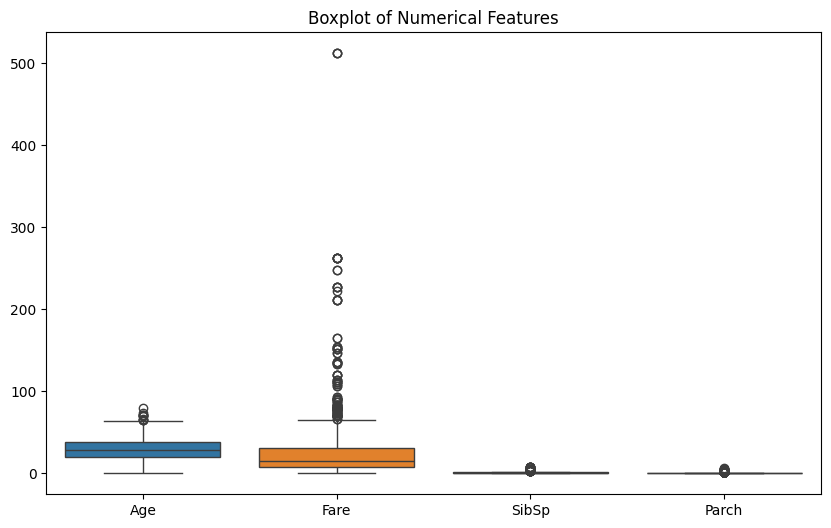

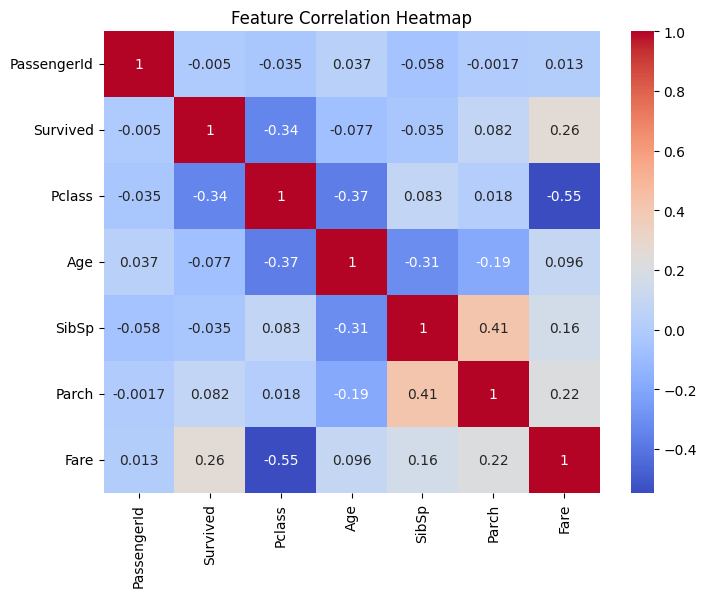

<ipython-input-6-d04c43610d20>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
<ipython-input-6-d04c43610d20>:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
ROC AUC Score: 0.8824


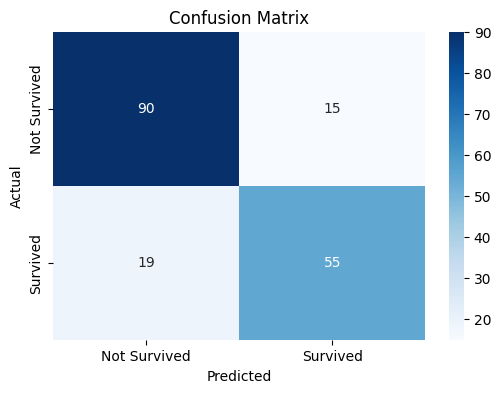

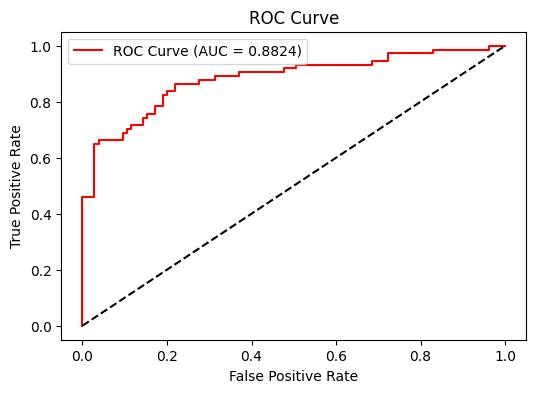

2025-03-07 20:19:57.690 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.788 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-07 20:19:57.790 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.815 Thread 'MainThread': mi

Model saved as logistic_regression_model.pkl


2025-03-07 20:19:57.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 20:19:57.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import pickle
import streamlit as st

# Load datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

# ================================
# 🚀 1. EXPLORATORY DATA ANALYSIS (EDA)
# ================================

# Display basic info
print(train_df.info())

# Check for missing values
print("Missing values:\n", train_df.isnull().sum())

# Plot histograms of numerical features
# Select only numerical features for histogram
numerical_features = train_df.select_dtypes(include=np.number).columns
train_df[numerical_features].hist(figsize=(10, 8))
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplot of Numerical Features")
plt.show()

# Heatmap to show correlation
plt.figure(figsize=(8, 6))
# Select only numerical features for correlation
numerical_features = train_df.select_dtypes(include=np.number).columns
sns.heatmap(train_df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ================================
# 🚀 2. DATA PREPROCESSING
# ================================

# Handle missing values
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
train_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)

# Drop unnecessary columns
train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
train_df["Sex"] = encoder.fit_transform(train_df["Sex"])
train_df["Embarked"] = encoder.fit_transform(train_df["Embarked"])

# Feature Scaling
scaler = StandardScaler()
train_df[["Age", "Fare", "SibSp", "Parch"]] = scaler.fit_transform(train_df[["Age", "Fare", "SibSp", "Parch"]])

# Splitting Data
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# 🚀 3. MODEL BUILDING & TRAINING
# ================================

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# ================================
# 🚀 4. MODEL EVALUATION
# ================================

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.4f})", color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ================================
# 🚀 5. MODEL SAVING & DEPLOYMENT
# ================================

# Save the trained model using pickle
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as logistic_regression_model.pkl")

# ================================
# 🚀 6. STREAMLIT DEPLOYMENT
# ================================

# Create a Streamlit app
def run_streamlit():
    st.title("Titanic Survival Prediction")
    st.write("Enter passenger details to predict survival.")

    # User input fields
    Pclass = st.selectbox("Pclass", [1, 2, 3])
    Sex = st.selectbox("Sex", ["Male", "Female"])
    Age = st.number_input("Age", min_value=0, max_value=100, value=30)
    SibSp = st.number_input("Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
    Parch = st.number_input("Parents/Children Aboard", min_value=0, max_value=10, value=0)
    Fare = st.number_input("Fare", min_value=0, value=50)
    Embarked = st.selectbox("Embarked", ["C", "Q", "S"])

    # Convert categorical values to match the model's encoding
    Sex = 1 if Sex == "Male" else 0
    Embarked = {"C": 0, "Q": 1, "S": 2}[Embarked]

    # Feature scaling
    Age = (Age - train_df["Age"].mean()) / train_df["Age"].std()
    Fare = (Fare - train_df["Fare"].mean()) / train_df["Fare"].std()

    # Load the saved model
    with open("logistic_regression_model.pkl", "rb") as file:
        model = pickle.load(file)

    # Make prediction
    input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])
    prediction = model.predict(input_data)[0]
    prediction_proba = model.predict_proba(input_data)[0][1]

    # Display result
    if prediction == 1:
        st.success(f"The passenger **SURVIVED** with probability {prediction_proba:.2f}")
    else:
        st.error(f"The passenger **DID NOT SURVIVE** with probability {1 - prediction_proba:.2f}")

# Run Streamlit
if __name__ == "__main__":
    run_streamlit()


## Interview Questions
1. What is the difference between precision and recall?
Precision and recall are evaluation metrics used in classification problems, particularly in imbalanced datasets.

Metric	Definition	Formula	When is it Important?
Precision	Measures how many predicted positives are actually correct.
Precision
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
​
When false positives are costly (e.g., fraud detection, spam filtering).
Recall	Measures how many actual positives were correctly predicted.
Recall
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN
TP
​
When false negatives are costly (e.g., medical diagnosis, cancer detection).
 Example:

In a spam email classifier:
High precision ensures that when an email is classified as spam, it's actually spam.
High recall ensures that most spam emails are detected, even if a few non-spam emails are mistakenly classified as spam.
2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique used to evaluate a model’s performance by splitting the dataset into multiple subsets (folds). It ensures that the model is tested on different portions of the data to reduce overfitting.

Why is it important in binary classification?

Prevents Overfitting – Ensures the model generalizes well by testing on different data splits.
Provides Reliable Metrics – Produces more stable accuracy, precision, recall, and F1-score.
Utilizes Data Efficiently – Every observation is used for both training and validation.

Common Cross-Validation Methods:

K-Fold Cross-Validation (Most commonly used, k=5 or 10)
Stratified K-Fold (Maintains class balance in each fold, useful for imbalanced datasets)
Leave-One-Out Cross-Validation (LOOCV) (Each data point is a test set once, expensive for large datasets)